In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
us=pd.read_csv('/content/drive/My Drive/USvideos.csv')
us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# **Data Cleaning**

In [0]:
from datetime import datetime
us['trending_date']=us['trending_date'].apply(lambda x: datetime.strptime('20'+x, '%Y.%d.%m'))

In [0]:
us['publish_time']=pd.to_datetime(us['publish_time']).dt.date

In [0]:
#drop not so useful columns
us=us.drop(['video_id','thumbnail_link'],axis=1)

In [7]:
#let's start with some obvious questions, how many trending videos do we have for each day 
us['trending_date'].value_counts()

2017-12-27    200
2018-04-19    200
2017-11-14    200
2017-11-27    200
2017-12-10    200
             ... 
2018-01-31    197
2018-02-01    197
2018-02-03    196
2018-02-02    196
2018-02-04    196
Name: trending_date, Length: 205, dtype: int64

In [8]:
print(min(us['trending_date']),'to',max(us['trending_date']))

2017-11-14 00:00:00 to 2018-06-14 00:00:00


There are roughly 200 trending videos on each day and the period of all the videos is from December 2017 to June 2018

In [0]:
category_name= {1:'Film and Animation',2: 'Cars and Vehicles',10:'Music',15:'Pets and Animals',17:'Sports',19:'Travel and Events',20:'Gaming',22:'People and Blog',23:'Comedy',24:'Entertainment',25:'News and Politics',26:'How to and style',27:'Education',28:'Science and Technology',29:'Non Profits and Activism',43:'Shows'}
us=us.replace({'category_id':category_name})

In [10]:
#let's see no. of videos in each category
us['category_id'].value_counts().reset_index().rename(columns={'index':'category','category_id':'count'})

,category,count
0,Entertainment,9964
1,Music,6472
2,How to and style,4146
3,Comedy,3457
4,People and Blog,3210
5,News and Politics,2487
6,Science and Technology,2401
7,Film and Animation,2345
8,Sports,2174
9,Education,1656


In [11]:
us.groupby(['channel_title','title']).count().reset_index()['channel_title'].value_counts().reset_index().rename(columns={'index':'Channel','channel_title':'Number of videos'}).head(15)

,Channel,Number of videos
0,ESPN,84
1,TheEllenShow,74
2,The Tonight Show Starring Jimmy Fallon,72
3,Jimmy Kimmel Live,70
4,Netflix,58
5,The Late Show with Stephen Colbert,58
6,NBA,54
7,CNN,52
8,Vox,48
9,The Late Late Show with James Corden,46


These are top 15 channels on the basis of no. of videos trended in our given time period. It's interesting to see all the major talk shows has appeared in this list, along with major sports channel like ESPN, NBA, NFL 

In [12]:
us['title'].value_counts().reset_index().rename(columns={'index':'title','title':'count'})

,title,count
0,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,30
1,"The ULTIMATE $30,000 Gaming PC Setup",29
2,Rooster Teeth Animated Adventures - Millie So ...,29
3,Charlie Puth - BOY [Official Audio],29
4,Sam Smith - Pray (Official Video) ft. Logic,29
...,...,...
6450,Kim Kardashian Lets Gender of Third Child Slip,1
6451,Ron Burgundy narrates MLS opener between the S...,1
6452,CEOs Try to Predict the Future in 10 Years | V...,1
6453,Father apologizes after lunging at Larry Nassa...,1


The count of above videos could mean that each videos has trended for that many count of days, for e.g. 'WE MADE OUR MOM CRY' has been on trending for 30 days, it may or may not be consecutive. Let's see few example to check if videos trend for consecutive days

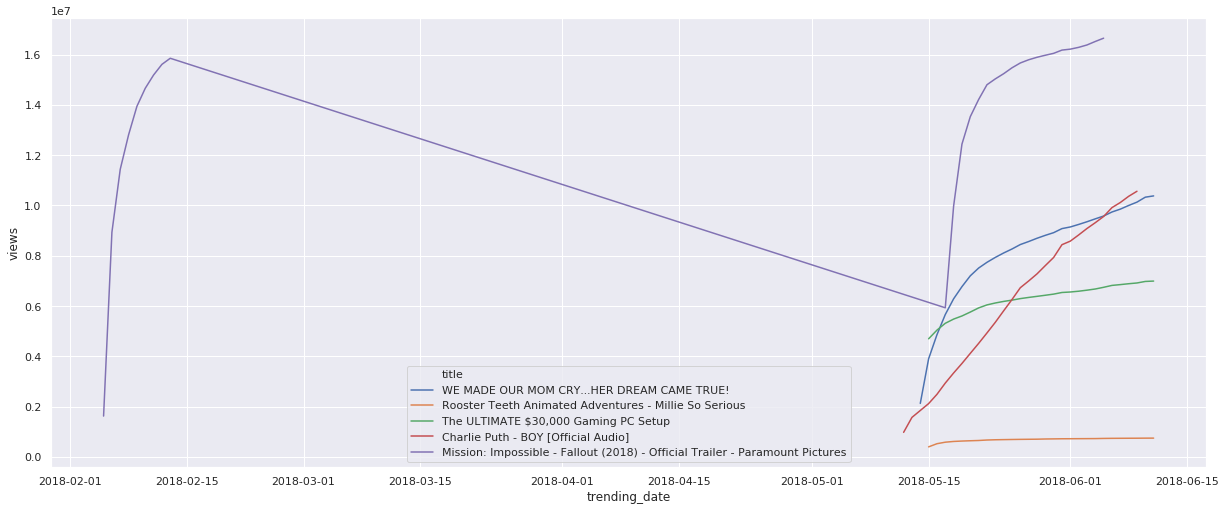

In [14]:
ex=us[us['title']=='WE MADE OUR MOM CRY...HER DREAM CAME TRUE!' ]
ex2=us[us['title']=='Rooster Teeth Animated Adventures - Millie So Serious']
ex3= us[us['title']=='The ULTIMATE $30,000 Gaming PC Setup']
ex4=us[us['title']=='Charlie Puth - BOY [Official Audio]']
ex5=us[us['title']=='Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures']
ex_all=pd.concat([ex,ex2,ex3,ex4,ex5])
sns.set(rc={'figure.figsize':(20.7,8.27)})
fig= sns.lineplot(x= 'trending_date',y='views',hue='title',data=ex_all)

Apparently, 4 out of 5 of these videos were trending consecutively, Mission Impossible being the odd one, which has bit wierd trend line, let's try to find why it is the case


In [15]:
ex5['publish_time'].unique()

array([datetime.date(2018, 2, 5), datetime.date(2018, 5, 16)],
      dtype=object)

Well, looking at the publish time of Mission impossible, it has two unique dates, one is 5th feb 2018 and 16th may 2018. There could be two reason for this either they published two different trailers with similar title or they re-uploaded. 

In [0]:
us['like_ratio']= us['likes']/us['views']
us['dislike_ratio']= us['dislikes']/us['views']
us['comment_ratio']=us['comment_count']/us['views']
us['likes_to_dislike']= us['likes']/us['dislikes']
us['engagement_ratio']=(us['likes'] + us['dislikes'] + us['comment_count'])/us['views']



*   'like ratio' is percentage of likes a video gets out of total views
*   dislike ratio is percentage of dislikes out of total views on video
*  comment ratio just like above percentage of comments out of total views on video
* like_to_dislike ratio is sort of like odd ratio which could tell degree of polarity in a particular video
* Engagement_ratio is just all interaction of audience with the video  



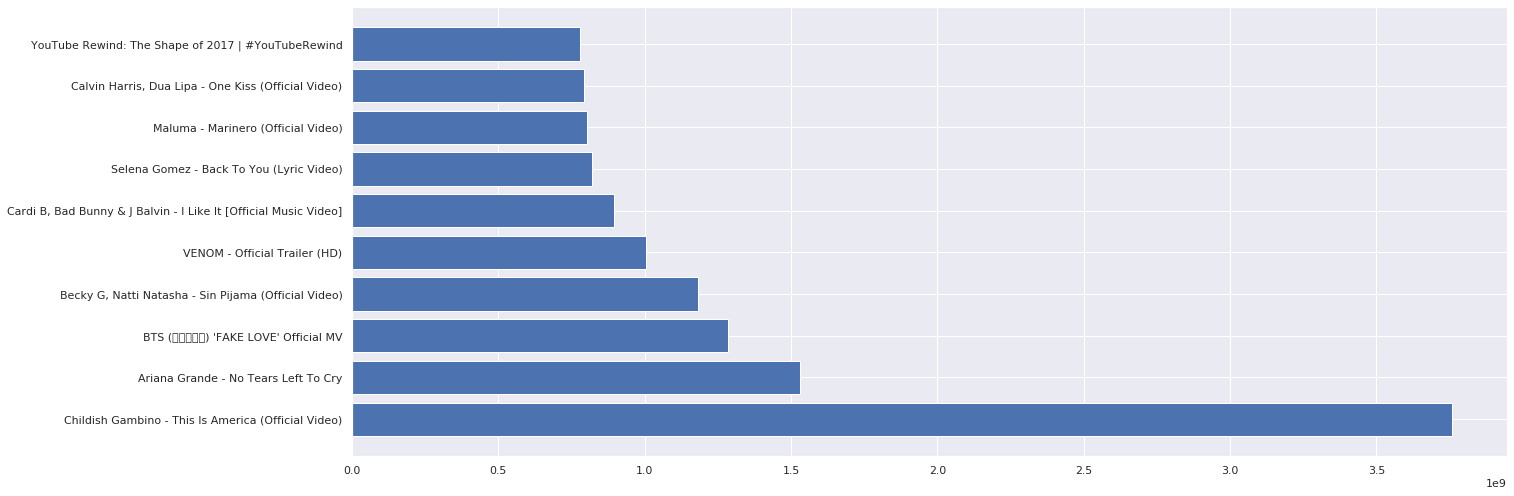

In [23]:
top_vids=pd.DataFrame(us.groupby(['title','channel_title']).sum()[['views','likes','dislikes','comment_count','like_ratio']]).reset_index().nlargest(10,'views')
plt.barh(y='title',width='views',data= top_vids)
plt.show()

*  Well, music is clearly dominating the youtube views, out of top 10 most viewed trending videos in our given time period, 8 are music videos, Childish Gambino's 'This is America' being the top one. 







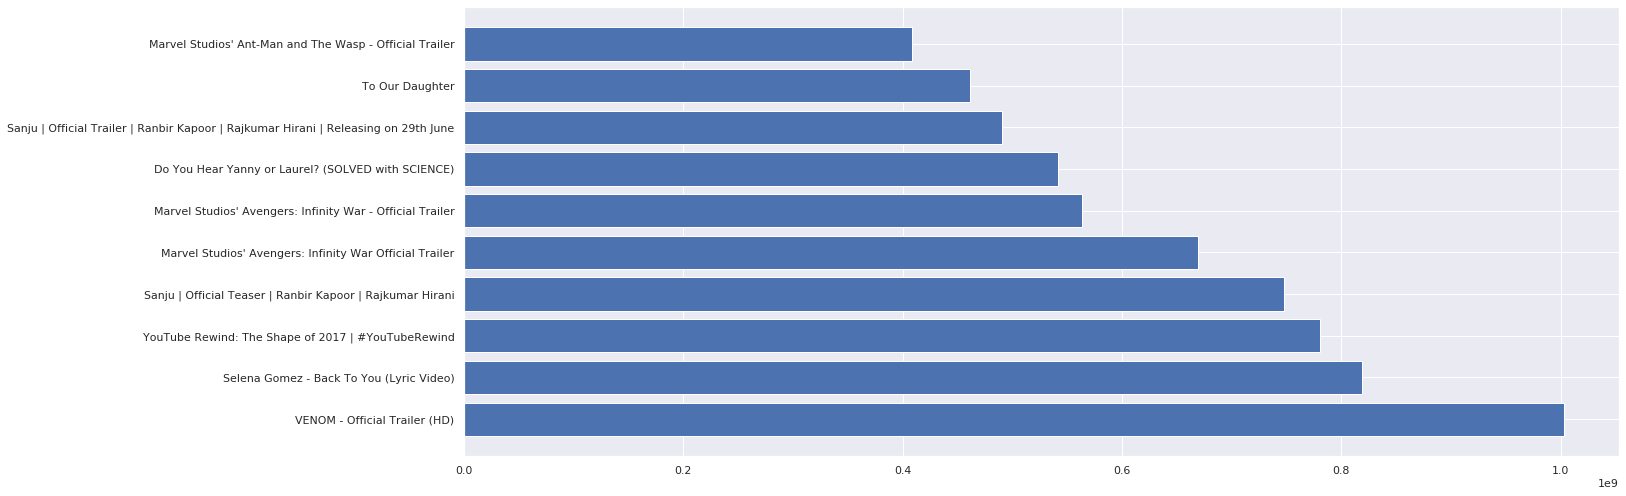

In [24]:
#let's drop music category and see how the other category videos are at the top
top_vids_no_music=pd.DataFrame(us[us['category_id']!='Music'].groupby(['title','channel_title']).sum()[['views','likes','dislikes','comment_count','like_ratio']]).reset_index().nlargest(10,'views')
plt.barh(y='title',width='views',data= top_vids_no_music)
plt.show()



*   In this case, we see 6 out of the 10 videos are movie trailers, suprisingly 'Sanju' a bollywood movie trailer was trending in US  
*   For some reason, 'Back to you' by Selena Gomez is not in Music category. Also, 'To our Daughter' has 0 likes, it could be because their ratings are disabled. Lets find out. 



In [25]:
us[us['title']=='To Our Daughter'].head(1)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,like_ratio,dislike_ratio,comment_ratio,likes_to_dislike,engagement_ratio
16181,2018-02-05,To Our Daughter,Kylie Jenner,People and Blog,2018-02-04,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",20921796,0,0,0,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,0.0,0.0,0.0,NaN,0.0


Yup, there we see ratings are disabled for that video

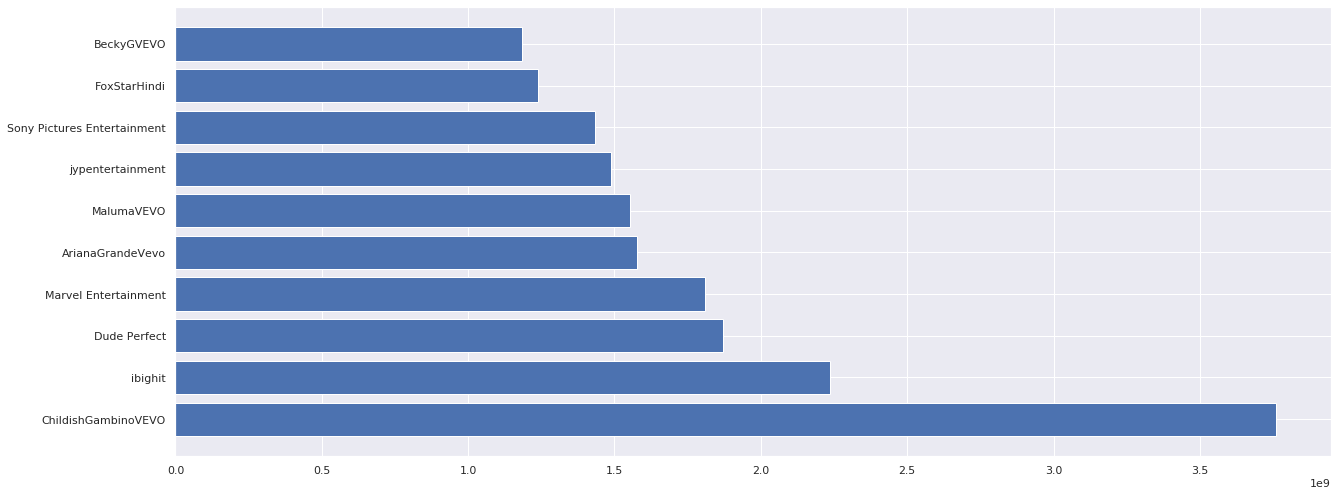

In [26]:
top_channel=us.groupby('channel_title').sum().nlargest(10,'views').reset_index()
plt.barh(y='channel_title',width='views',data= top_channel)
plt.show()

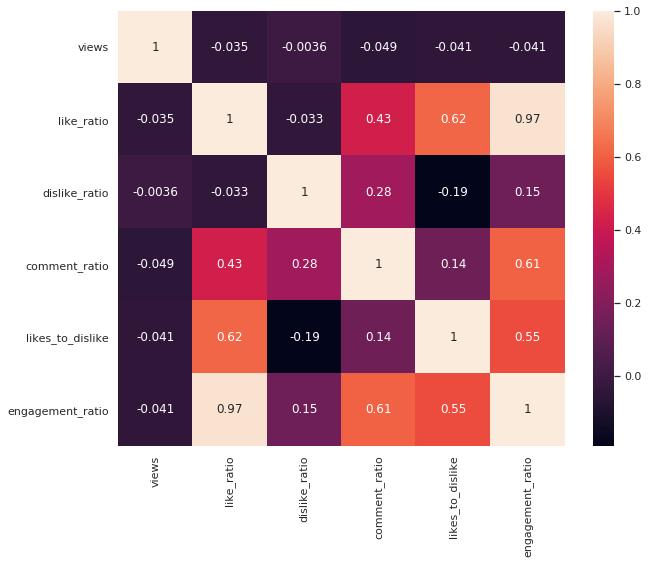

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(us.drop(['likes','dislikes','comment_count','comments_disabled','ratings_disabled','video_error_or_removed'],axis=1).corr(),annot=True)
plt.show()

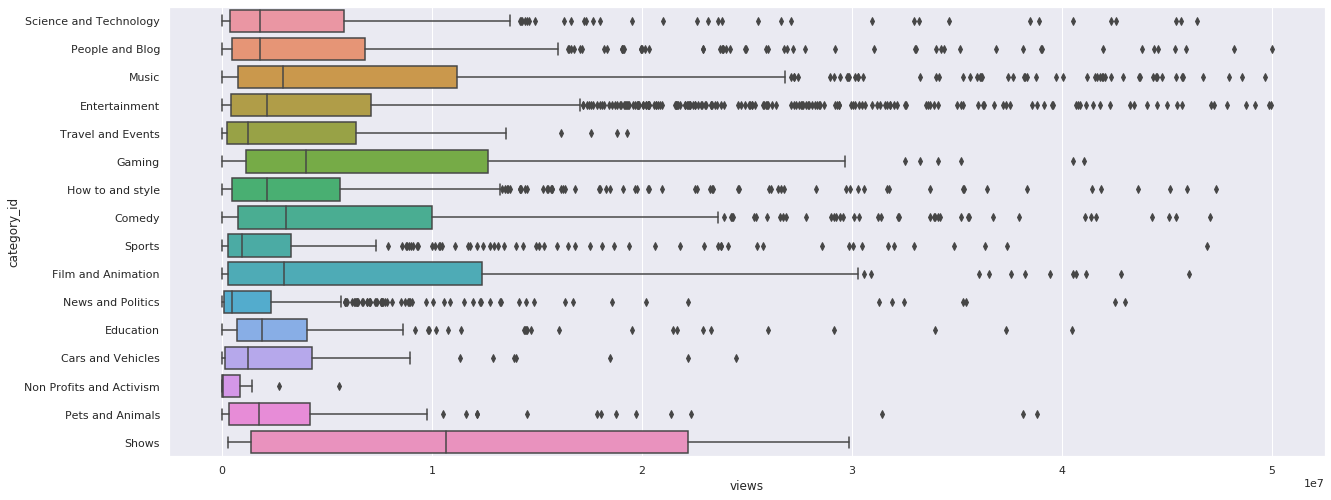

In [38]:
categ_dist=us.groupby(['title','category_id']).sum().reset_index()
categ_dist=categ_dist[categ_dist['views']<=50000000]
sns.boxplot(x='views',y='category_id',data=categ_dist)



*   Music gets the most views, certainly because most of us use youtube for music streaming as it's free
*   'Show' category doesn't seem to have any outliers, I would assume that it has it's niche and loyal audience 



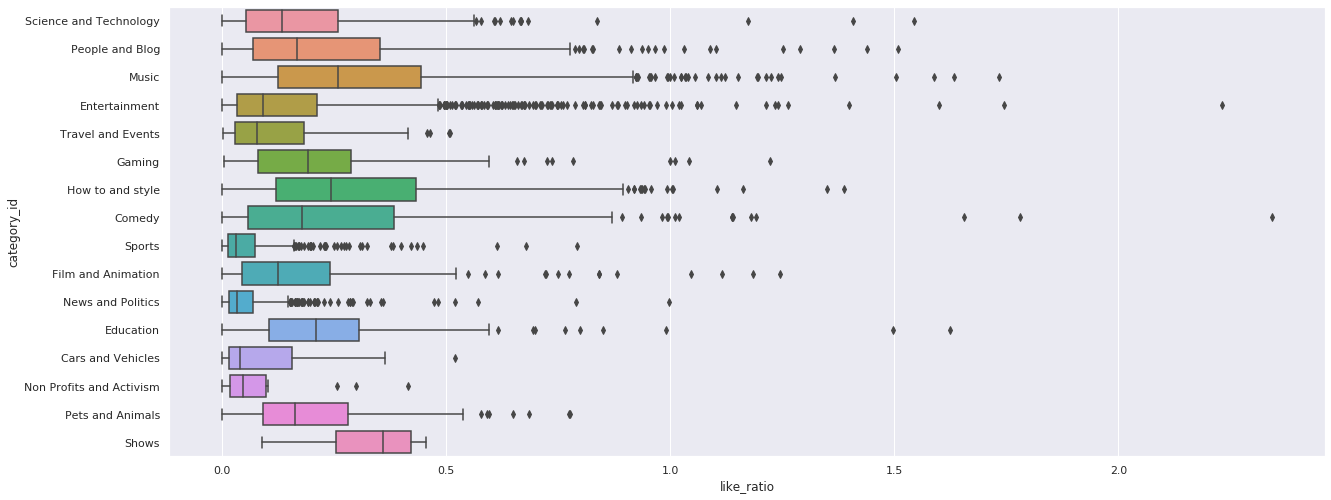

In [39]:
#fig= px.box(us.groupby(['title','category_id']).sum().reset_index(),x='category_id',y='like_ratio', hover_data=['title'])
sns.boxplot(x='like_ratio',y='category_id',data=categ_dist)

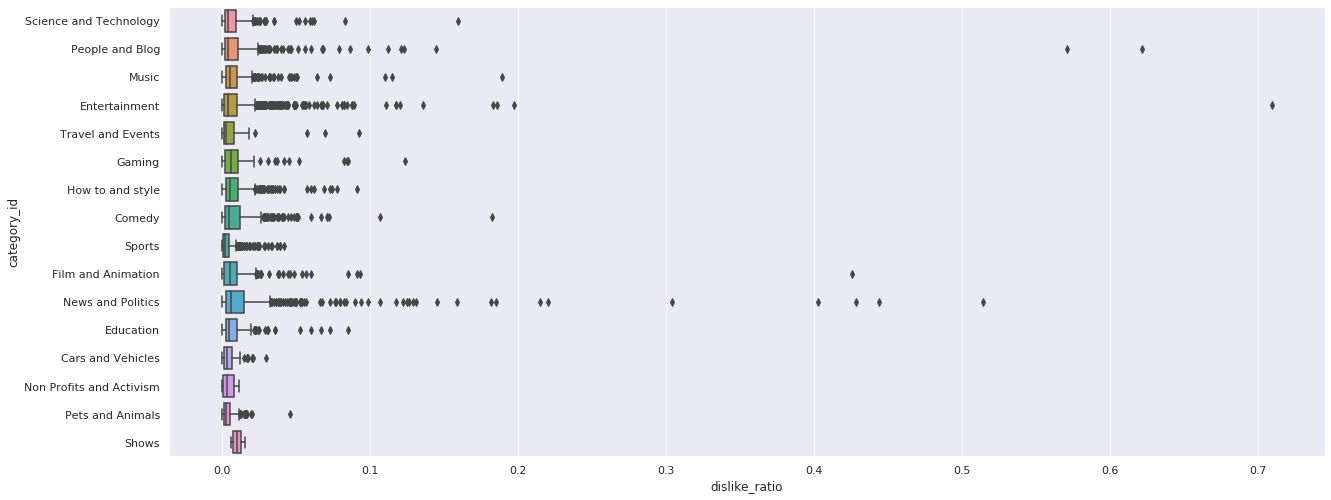

In [40]:
sns.boxplot(x='dislike_ratio',y='category_id',data=categ_dist)



*  Every category has got decent dislike ratio however, News and Politics has lot of outliers, probably because sometimes news and politics has two sides.  




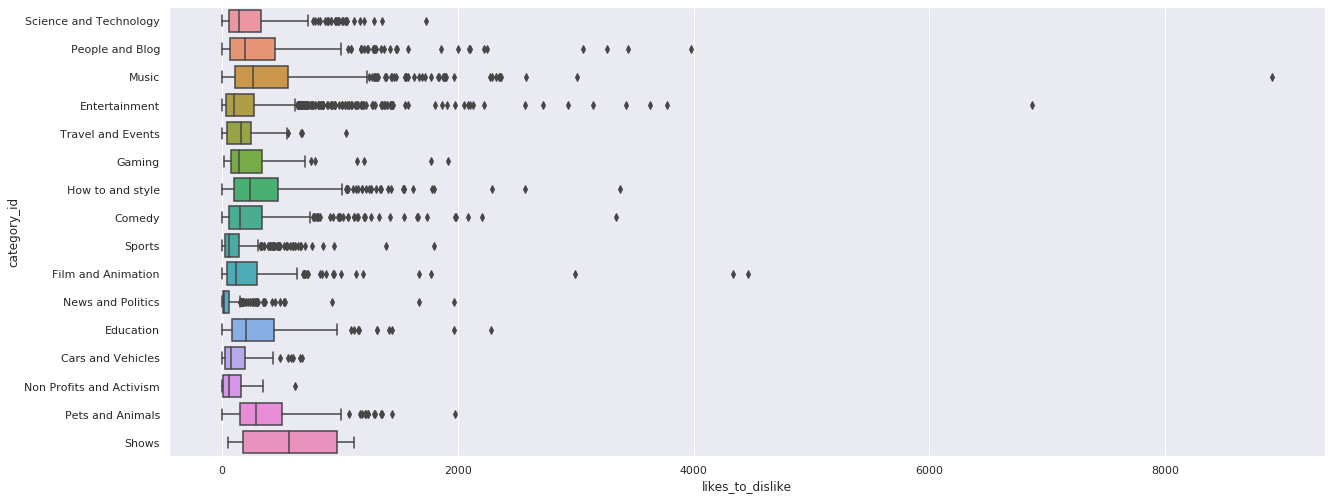

In [41]:
sns.boxplot(x='likes_to_dislike',y='category_id',data=categ_dist)

Our assumption about 'News and Politcs' becomes stronger from this, it has lowest likes to dislike ratio, which means people certainly has polarising views about videos in this categories.  

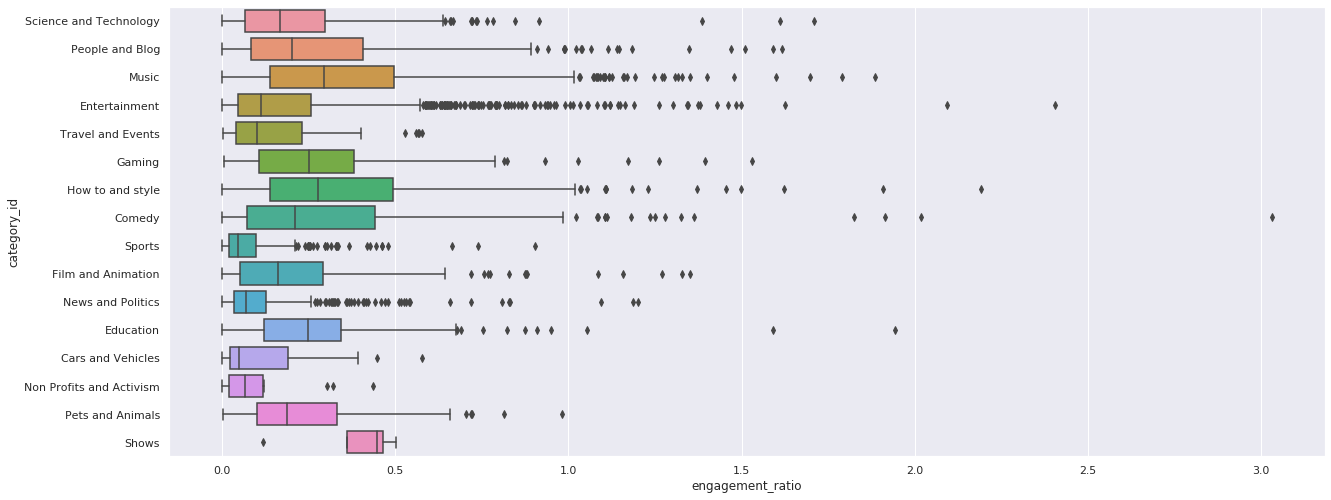

In [42]:
sns.boxplot(x='engagement_ratio',y='category_id',data=categ_dist)



*   Distribution of engagement ratio and like ratio across categories, seems bit identical, also they are highly correlated as observed in correlation matrix, that's certainly because in our definition of engagement ratio likes, dislikes and comments all three has equal weights but in terms of count likes on most of the videos are mostly far higher than disikes and comments   




In [0]:
from textblob import TextBlob
import re
def sentiment_an(text):
  polar=TextBlob(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())).sentiment.polarity
  return polar
us['title_polarity']=us['title'].apply(lambda x: sentiment_an(x))
us['title_sentiment']=us['title_polarity'].apply(lambda x: 'Positive' if x >0 else ('Neutral' if x==0 else 'Negative')  )

In [45]:
us['title_sentiment'].value_counts()

Neutral     23649
Positive    11489
Negative     5811
Name: title_sentiment, dtype: int64

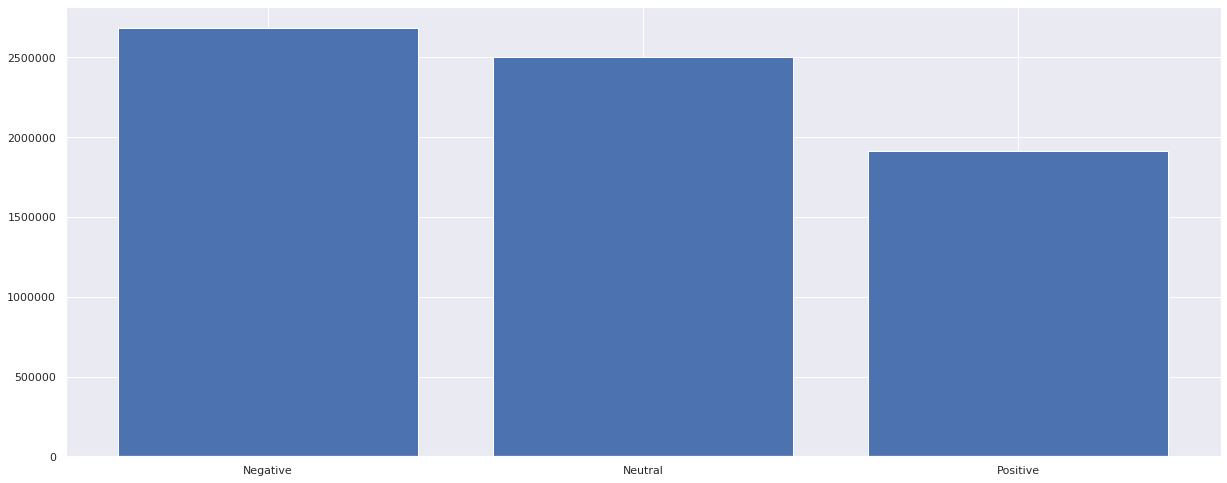

In [50]:
table_sent=us.groupby('title_sentiment').mean().round(0)['views'].reset_index()
plt.bar( x= 'title_sentiment', height = 'views',data=table_sent)
plt.show()

This sentiment analysis is certainly not accurate, it requires more sophisticated ways than above